# Imports

In [1]:

from PIL import Image
from pathlib import Path

from torchvision import transforms as T

# Function definitions

# Example image

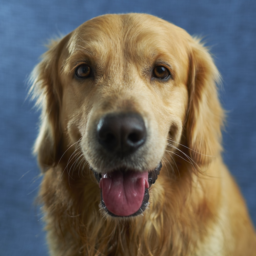

In [2]:
image_path = Path('images/Dog.jpeg')
image = T.Resize(256)(Image.open(image_path))
image = T.CenterCrop(256)(image)
image

In [3]:
# Create images in different sizes
images = [T.Resize(size)(image) for size in [1,2,4,8,16,32,64,128,256]]

# Visualizations

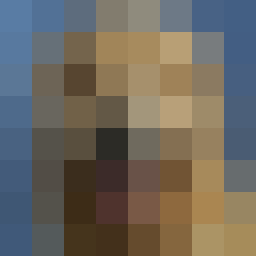

In [4]:
images[3].resize((256,256), Image.NEAREST)

In [5]:
import matplotlib.pyplot as plt

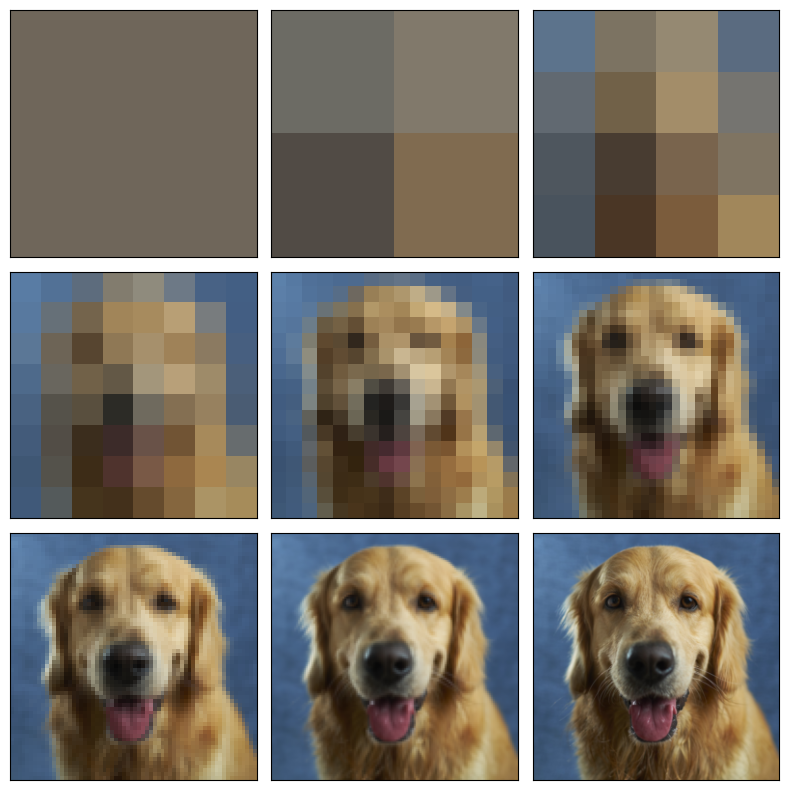

In [6]:
# plot 0-8 images in a 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(8,8))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()
plt.show()

In [7]:
# save the above plot
fig.savefig('images/resize.png', dpi=300)

In [8]:
# Make a gif from the images
images[0].resize((256,256), Image.NEAREST).save('images/resize.gif', save_all=True, append_images=[image.resize((256,256), Image.NEAREST) for image in (images[1:] + images[::-1])], optimize=False, duration=100, loop=0)

# RGB to 256 discrete colors

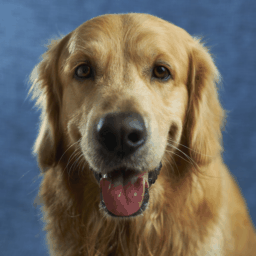

In [9]:
# rgb to 256 color palette
image.convert('P', palette=Image.ADAPTIVE, colors=256)

# Palettize the images

In [10]:
import numpy as np
from PIL import Image

def generate_websafe_palette():
    """
    Generates the 216-color web-safe palette.
    """
    colors = []
    palette_divisions = [0, 51, 102, 153, 204, 255]
    for r in palette_divisions:
        for g in palette_divisions:
            for b in palette_divisions:
                colors.append((r, g, b))
    return colors

# Use this function to get the web-safe colors
web_safe_colors = generate_websafe_palette()

# If you want to see the colors:
print(web_safe_colors)

[(0, 0, 0), (0, 0, 51), (0, 0, 102), (0, 0, 153), (0, 0, 204), (0, 0, 255), (0, 51, 0), (0, 51, 51), (0, 51, 102), (0, 51, 153), (0, 51, 204), (0, 51, 255), (0, 102, 0), (0, 102, 51), (0, 102, 102), (0, 102, 153), (0, 102, 204), (0, 102, 255), (0, 153, 0), (0, 153, 51), (0, 153, 102), (0, 153, 153), (0, 153, 204), (0, 153, 255), (0, 204, 0), (0, 204, 51), (0, 204, 102), (0, 204, 153), (0, 204, 204), (0, 204, 255), (0, 255, 0), (0, 255, 51), (0, 255, 102), (0, 255, 153), (0, 255, 204), (0, 255, 255), (51, 0, 0), (51, 0, 51), (51, 0, 102), (51, 0, 153), (51, 0, 204), (51, 0, 255), (51, 51, 0), (51, 51, 51), (51, 51, 102), (51, 51, 153), (51, 51, 204), (51, 51, 255), (51, 102, 0), (51, 102, 51), (51, 102, 102), (51, 102, 153), (51, 102, 204), (51, 102, 255), (51, 153, 0), (51, 153, 51), (51, 153, 102), (51, 153, 153), (51, 153, 204), (51, 153, 255), (51, 204, 0), (51, 204, 51), (51, 204, 102), (51, 204, 153), (51, 204, 204), (51, 204, 255), (51, 255, 0), (51, 255, 51), (51, 255, 102), (51

In [11]:
from utils import convert_to_palette, ensure_rgb_or_l_mode

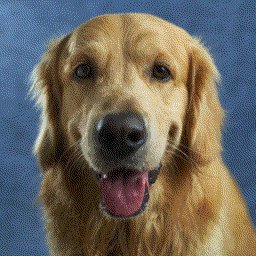

In [12]:


# Convert the image using the web-safe palette
converted_img = convert_to_palette(image, web_safe_colors)
converted_img


In [13]:
images[0].size, images[1].size

((1, 1), (2, 2))

In [14]:
images = [convert_to_palette(image, web_safe_colors).resize((256,256), Image.NEAREST) for image in images]

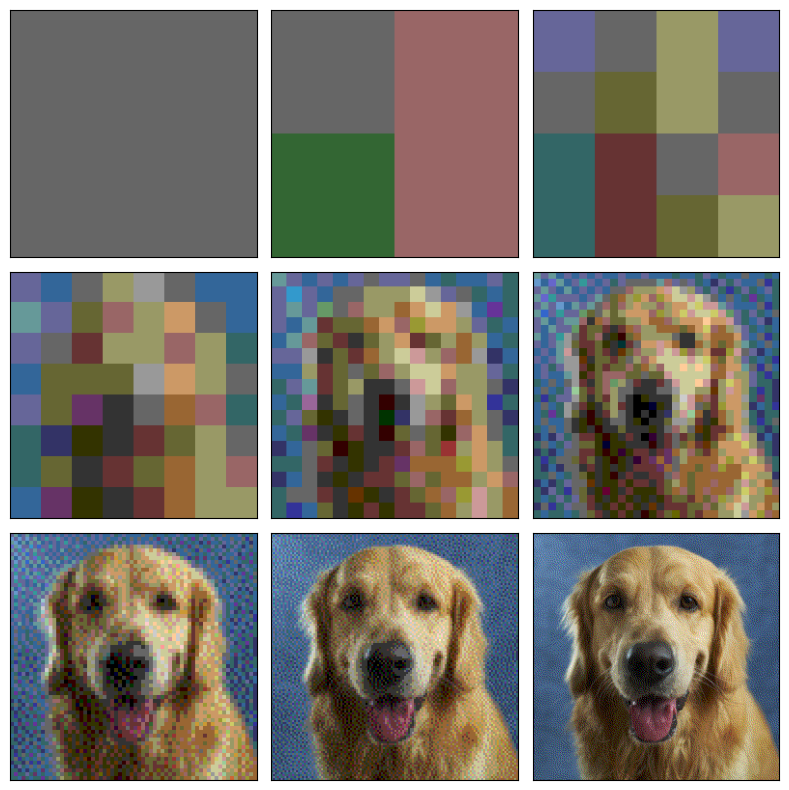

In [15]:
# plot 0-8 images in a 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(8,8))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()
plt.show()

In [16]:
# save the above plot
fig.savefig('images/resize_palette.png', dpi=300)

In [17]:
image.size

(256, 256)

In [18]:
# Create images in different sizes
images = [convert_to_palette(ensure_rgb_or_l_mode(T.Resize(size)(convert_to_palette(image, web_safe_colors))), web_safe_colors) for size in [1,2,4,8,16,32,64,128,256]]

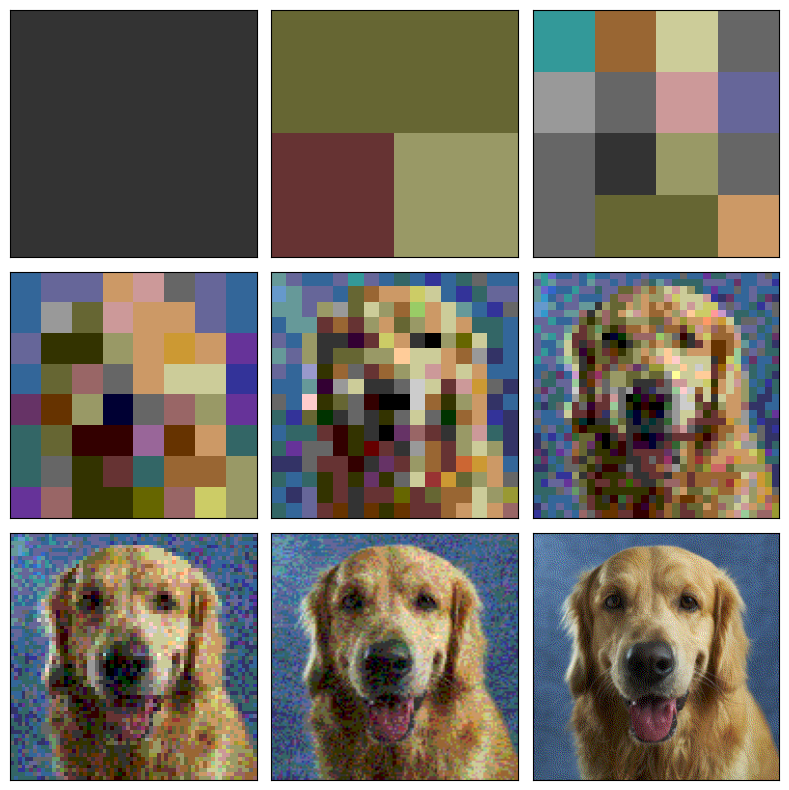

In [19]:
# plot 0-8 images in a 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(8,8))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()
plt.show()

In [ ]:
# save the above plot
fig.savefig('images/resize_palette_2.png', dpi=300)